<a href="https://colab.research.google.com/github/noahvlone/decision-support-system-AHP-method/blob/main/Sistem_Pendukung_Keputusan_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("NIM         : 4522210103")
print("Nama        : Farhan Ramadhan")
print("Mata Kuliah : Sistem Pendukung Keputusan A")

NIM         : 4522210103
Nama        : Farhan Ramadhan
Mata Kuliah : Sistem Pendukung Keputusan A


##Import Libraries

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

##Fetch Historical Stocks Data

In [3]:
# Step 1: Fetch Historical Stock Data
print("Fetching stock data from Yahoo Finance...")
stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'META', 'IBM', 'SONY', 'BABA']
data = yf.download(stocks, start='2024-01-01', end='2024-12-01')

Fetching stock data from Yahoo Finance...


[*********************100%***********************]  10 of 10 completed


##Calculate Criteria Values

In [4]:
# Calculate daily returns
returns = data['Adj Close'].pct_change().dropna()

# Step 2: Calculate Criteria Values
volatility = returns.std() * np.sqrt(252)  # Annualized risk
average_return = returns.mean() * 252      # Annualized return
average_volume = data['Volume'].mean()     # Average liquidity

# Prepare criteria DataFrame
criteria_df = pd.DataFrame({
    'Risk': volatility,
    'Return': average_return,
    'Liquidity': average_volume
})

print("\n--- Criteria Values ---")
print(criteria_df)


--- Criteria Values ---
            Risk    Return     Liquidity
Ticker                                  
AAPL    0.229175  0.300638  5.808724e+07
AMZN    0.282015  0.397960  4.141500e+07
BABA    0.376040  0.264247  1.758604e+07
GOOGL   0.272483  0.260100  2.715542e+07
IBM     0.234417  0.441553  4.239343e+06
META    0.371002  0.624627  1.487792e+07
MSFT    0.200016  0.173557  2.055511e+07
NVDA    0.538985  1.301261  3.939699e+08
SONY    0.275395  0.119852  3.832239e+06
TSLA    0.634702  0.556462  9.521575e+07


##Define AHP Pairwise Comparison Matrix

In [5]:
# Step 3: Define Pairwise Comparison Matrix and Criteria Weights
pairwise_matrix = np.array([
    [1, 3, 5],
    [1/3, 1, 3],
    [1/5, 1/3, 1]
])

# Function to calculate weights and check consistency
def calculate_ahp_weights(matrix):
    n = matrix.shape[0]
    column_sum = matrix.sum(axis=0)
    normalized_matrix = matrix / column_sum
    weights = normalized_matrix.mean(axis=1)

    # Consistency check
    eigenvalues = np.dot(matrix, weights) / weights
    lambda_max = np.mean(eigenvalues)
    CI = (lambda_max - n) / (n - 1)
    RI_values = {1: 0.00, 2: 0.00, 3: 0.58, 4: 0.90, 5: 1.12}
    RI = RI_values.get(n, 1.12)
    CR = CI / RI

    return weights, CR

criteria_weights, CR = calculate_ahp_weights(pairwise_matrix)
if CR >= 0.1:
    raise ValueError(f"Consistency Ratio is too high (CR = {CR:.2f}). Please revise the pairwise matrix.")
print("\n--- Criteria Weights ---")
print(criteria_weights)


--- Criteria Weights ---
[0.63334572 0.26049796 0.10615632]


##Normalize and Calculate Overall Scores

In [9]:
# Step 4: Normalize and Calculate Scores
def normalize(values):
    return values / values.sum()

# Invert Risk since lower is better
criteria_df['Normalized Risk'] = normalize(1 / criteria_df['Risk'])
criteria_df['Normalized Return'] = normalize(criteria_df['Return'])
criteria_df['Normalized Liquidity'] = normalize(criteria_df['Liquidity'])

# Calculate Overall Scores
criteria_df['Overall Score'] = (
    criteria_weights[0] * criteria_df['Normalized Risk'] +
    criteria_weights[1] * criteria_df['Normalized Return'] +
    criteria_weights[2] * criteria_df['Normalized Liquidity']
)

# Sort by Overall Score
criteria_df = criteria_df.sort_values(by='Overall Score', ascending=False)

##Display Results


--- Stock Rankings ---
            Risk    Return     Liquidity  Normalized Risk  Normalized Return  \
Ticker                                                                         
NVDA    0.538985  1.301261  3.939699e+08         0.055780           0.293060   
AAPL    0.229175  0.300638  5.808724e+07         0.131187           0.067707   
MSFT    0.200016  0.173557  2.055511e+07         0.150311           0.039087   
IBM     0.234417  0.441553  4.239343e+06         0.128253           0.099443   
AMZN    0.282015  0.397960  4.141500e+07         0.106607           0.089625   
META    0.371002  0.624627  1.487792e+07         0.081037           0.140674   
GOOGL   0.272483  0.260100  2.715542e+07         0.110336           0.058578   
TSLA    0.634702  0.556462  9.521575e+07         0.047368           0.125322   
SONY    0.275395  0.119852  3.832239e+06         0.109170           0.026992   
BABA    0.376040  0.264247  1.758604e+07         0.079951           0.059512   

        Normali

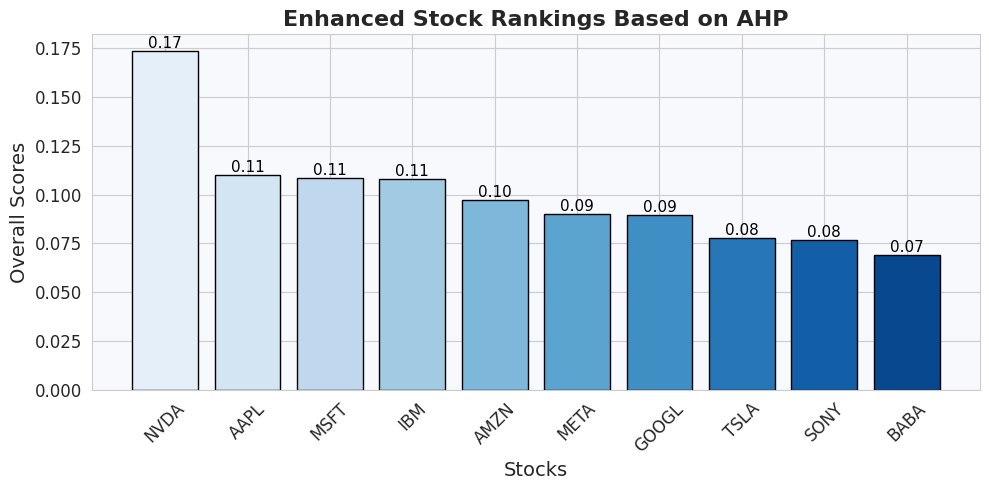

In [13]:
# Step 5: Visualization with Enhanced Aesthetics
print("\n--- Stock Rankings ---")
#print(criteria_df[['Normalized Risk', 'Normalized Return', 'Normalized Liquidity', 'Overall Score']])
print(criteria_df)
print("\n")

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
bar_colors = sns.color_palette("Blues", len(criteria_df))

bars = plt.bar(criteria_df.index, criteria_df['Overall Score'], color=bar_colors, edgecolor='black')
plt.xlabel('Stocks', fontsize=14)
plt.ylabel('Overall Scores', fontsize=14)
plt.title('Enhanced Stock Rankings Based on AHP', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add annotations to bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f'{bar.get_height():.2f}',
        ha='center',
        va='bottom',
        fontsize=11,
        color='black'
    )

# Add gradient background
plt.gca().set_facecolor('#f7f9fc')
plt.tight_layout()
plt.show()

##Save Data

In [11]:
# Save historical stock data to a CSV file
historical_data_filename = 'historical_stock_data.csv'
data.to_csv(historical_data_filename)
print(f"\nHistorical stock data saved to: {historical_data_filename}")

# Save criteria dataframe to a CSV file
criteria_data_filename = 'criteria_data.csv'
criteria_df.to_csv(criteria_data_filename)
print(f"Criteria and overall scores saved to: {criteria_data_filename}")


Historical stock data saved to: historical_stock_data.csv
Criteria and overall scores saved to: criteria_data.csv
